<a href="https://colab.research.google.com/github/YagmurTaze/FaceMaskDetection/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adamax

from tensorflow.keras.utils import plot_model

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Dataset

In [3]:
data_with_mask_dir = '/content/drive/MyDrive/Datasets/Face Mask Dataset/with_mask'
data_without_mask_dir = '/content/drive/MyDrive/Datasets/Face Mask Dataset/without_mask'

In [4]:
data_with_mask= os.listdir(data_with_mask_dir)[:1]
data_without_mask= os.listdir(data_without_mask_dir)[:1]

Text(0.5, 1.0, 'Image with Mask')

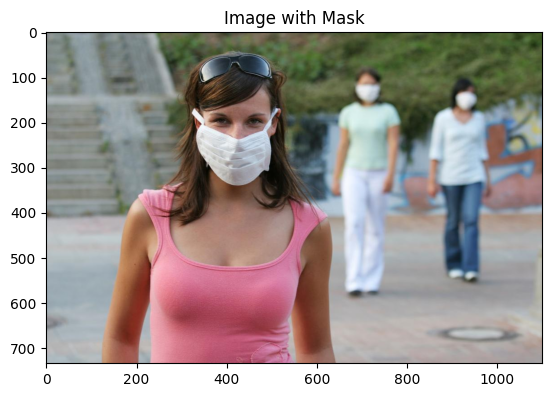

In [5]:
img_path = os.path.join(data_with_mask_dir, data_with_mask[0])
img = Image.open(img_path)
plt.imshow(img)
plt.title('Image with Mask')

Text(0.5, 1.0, 'Image without Mask')

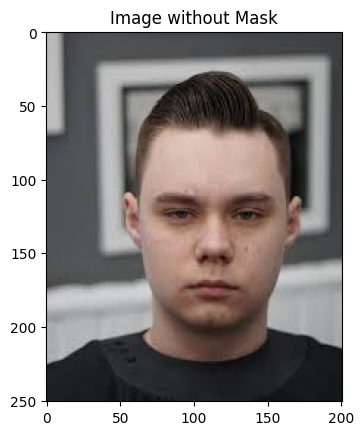

In [6]:
img_path = os.path.join(data_without_mask_dir, data_without_mask[0])
img = Image.open(img_path)
plt.imshow(img)
plt.title('Image without Mask')

## Preprocessing the Dataset

In [7]:
data_with_mask= os.listdir(data_with_mask_dir)
data_without_mask= os.listdir(data_without_mask_dir)

In [8]:
print('Number of without mask images:', len(data_without_mask))
print('Number of with mask images:', len(data_with_mask))

Number of without mask images: 3828
Number of with mask images: 3755


In [9]:
with_mask_labels = [1]*len(data_with_mask)
without_mask_labels = [0]*len(data_without_mask)

Labels = with_mask_labels + without_mask_labels

In [10]:
images = []
def load_images_from_folder(folder):

    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        img = img.resize((128,128))
        img = img.convert('RGB')
        images.append(np.array(img))
    return images

with_mask_images = load_images_from_folder(data_with_mask_dir)
without_mask_images = load_images_from_folder(data_without_mask_dir)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
print(len(images),"images.")
print(images[0].shape, " is the shape of each image.")

7583 images.
(128, 128, 3)  is the shape of each image.


In [15]:
X = np.array(images)
Y = np.array(Labels)

In [16]:
print(X.shape)
print(Y.shape)

(7583, 128, 128, 3)
(7583,)
